In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs

import plotly.express as px
import plotly.graph_objects as go

from utils.get_raw_data import (
    get_raw_data_array,
    locate_raw_data,
    get_raw_data_array_from_filename,
    sum_multiple_data_arrays,
    get_multiple_data_arrays,
)
from utils.getting_spectral_lines_from_hspy import get_the_lines_from_hspy
from utils.helper_plotting import plotly_plot_multiple_spectra, plot_multiple_spectra

from utils.gaussian_fitting import fit_peak_to_gaussian, fit_two_peaks_to_two_gaussians

In [2]:
lines = get_the_lines_from_hspy()
emsa = locate_raw_data()
# emsa

In [3]:
only30 = get_multiple_data_arrays(filters=["30kV"])
sum30, sum30_names = sum_multiple_data_arrays(only30, normalize=False)

Summed 6 arrays: Cu_30kV, Fe_30kV, GaAs_30kV, Mo_30kV, NW_30kV, Si_30kV


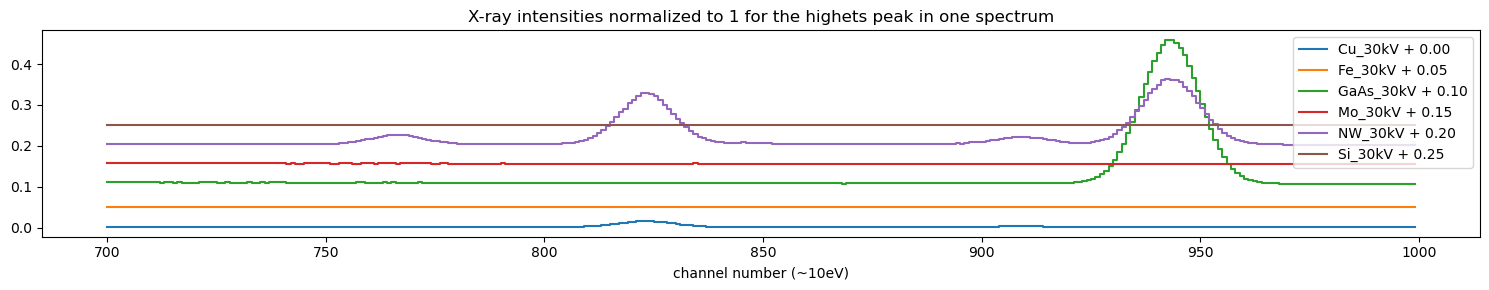

In [4]:
plot_multiple_spectra(only30, start=700, stop=1000, normalize=False, split=0.05)

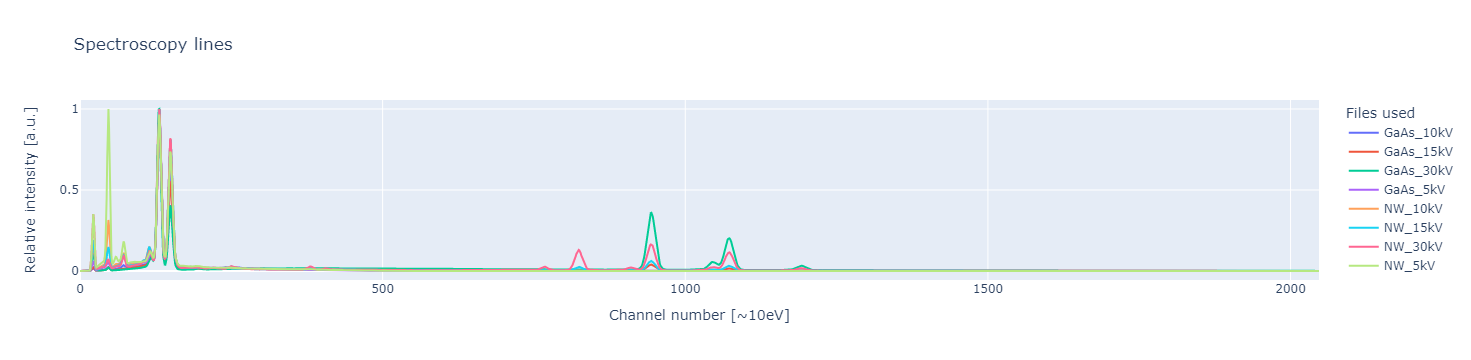

In [8]:
fig = plotly_plot_multiple_spectra(get_multiple_data_arrays(filters=["NW", "GaAs"]), mode='lines')
# fig.show()
# fig.write_html("../plots/all_NW_and_GaAs_seperated.html")

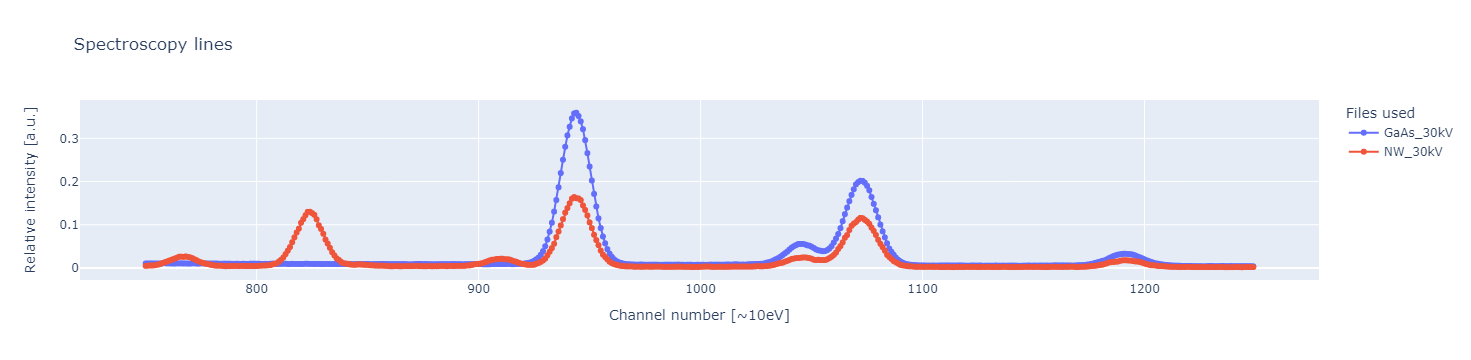

In [27]:
plotly_plot_multiple_spectra(ga30, start=750, stop=1250, split=None)

In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
fig = plotly_plot_multiple_spectra(arrays = get_multiple_data_arrays(every=True), mode='lines')
# fig.write_html("../plots/all_spectra.html")

In [41]:
# plotly_plot_multiple_spectra() takes a 2d list
summed = [sum_multiple_data_arrays(get_multiple_data_arrays(every=True))]


Summed 20 arrays: Cu_10kV, Cu_30kV, Cu_5kV, Fe_30kV, GaAs_10kV, GaAs_15kV, GaAs_30kV, GaAs_5kV, Mo_10kV, Mo_15kV, Mo_30kV, Mo_5kV, NW_10kV, NW_15kV, NW_30kV, NW_5kV, Si_10kV, Si_15kV, Si_30kV, Si_5kV


In [42]:
fig = plotly_plot_multiple_spectra(arrays = summed, mode='lines')
# fig.write_html("../plots/all_spectra_summed.html")

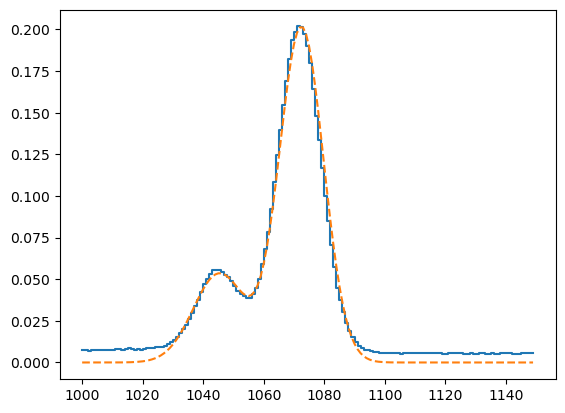

In [61]:
start = 1000
stop = 1150

x = x2048[start:stop]
y = arrays[0][1][start:stop]

init_vals = [1, 1045, 1, 1, 1075, 1]  # for [amp1, cen1, wid1, amp2, cen2, wid2]
best_vals, covar = curve_fit(two_gaussians, x, y, p0=init_vals)

y_est = two_gaussians(
    x,
    best_vals[0],
    best_vals[1],
    best_vals[2],
    best_vals[3],
    best_vals[4],
    best_vals[5],
)

plt.step(x, y)
plt.plot(x, y_est, "--")

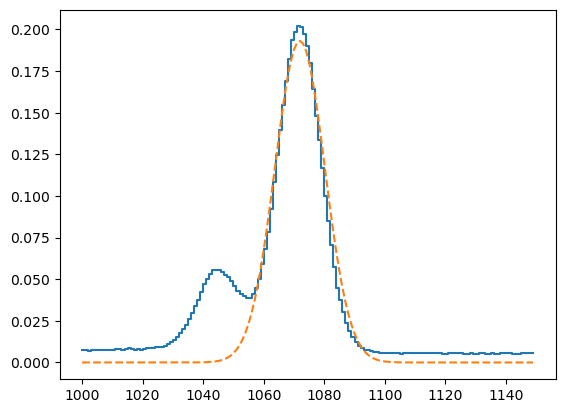

In [60]:
start = 1000
stop = 1150

x = x2048[start:stop]
y = arrays[0][1][start:stop]

init_vals = [1, 1045, 1]  # for [amp1, cen1, wid1, amp2, cen2, wid2]
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)

y_est = gaussian(
    x,
    best_vals[0],
    best_vals[1],
    best_vals[2],
)

plt.step(x, y)
plt.plot(x, y_est, "--")

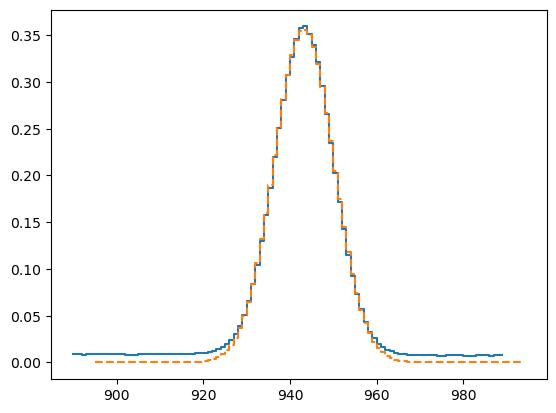

In [79]:
start = 890
stop = 990
arrays = get_multiple_data_arrays(filters=["GaAs_30kV"])
x = x2048 = np.arange(0, 2048, 1) # evt ...arange(start, stop, 1)

xy_est = fit_peak_to_gaussian(arrays, 945)

plt.step(x2048[start:stop], arrays[0][1][start:stop])
plt.step(xy_est[0], xy_est[1], "--")



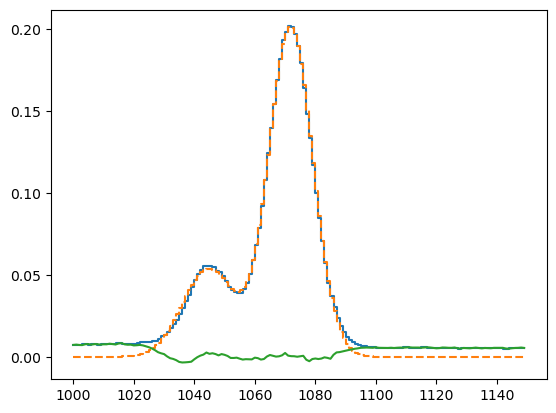

In [87]:
start = 1000
stop = 1150
xy_est = fit_two_peaks_to_two_gaussians(arrays, [1045, 1075], start=start, stop=stop)
arrays = get_multiple_data_arrays(filters=["GaAs_30kV"])
x2048 = np.arange(0, 2048, 1) # evt ...arange(start, stop, 1)

plt.step(x2048[start:stop], arrays[0][1][start:stop])
plt.step(xy_est[0], xy_est[1], "--")
plt.plot(xy_est[0], arrays[0][1][start:stop]- xy_est[1], "-")



In [82]:
arrays[0][1][1100:1140].std()

0.00020084833354915596

In [83]:
arrays[0][1][1100:1140].mean()

0.005513167438486861

In [84]:
arrays[0][1][1000:1020].std()

0.00031879702540993555

In [85]:
arrays[0][1][1000:1020].mean()

0.007710762707136082